# CHAPTER 3

# Section 1
## Playing with PyTorch tensors

In [1]:
import torch

data = torch.ones(3)
data

tensor([1., 1., 1.])

In [2]:
data[0], data[1]

(tensor(1.), tensor(1.))

In [3]:
float(data[0]), float(data[1])

(1.0, 1.0)

In [4]:
data[1] = 4 # mutable
data

tensor([1., 4., 1.])

In [5]:
a = torch.tensor([4, 5, 6, 7])
a

tensor([4, 5, 6, 7])

In [6]:
a.dtype

torch.int64

In [7]:
float(a[2])

6.0

In [8]:
p = torch.tensor([[4, 2], [4, 5.6], [1.3, 13]], dtype=torch.float64)
p

tensor([[ 4.0000,  2.0000],
        [ 4.0000,  5.6000],
        [ 1.3000, 13.0000]], dtype=torch.float64)

In [9]:
p.shape

torch.Size([3, 2])

In [10]:
p[0]

tensor([4., 2.], dtype=torch.float64)

In [11]:
p[0, 0], p[0, 1]

(tensor(4., dtype=torch.float64), tensor(2., dtype=torch.float64))

In [12]:
p[:, 0] # all rows, first column

tensor([4.0000, 4.0000, 1.3000], dtype=torch.float64)

In [13]:
p[None].shape

torch.Size([1, 3, 2])

In [51]:
# example image
img = torch.rand(3, 28, 28) * 255 # channels x rows x columns
img

tensor([[[7.3921e+01, 2.2177e+02, 9.5463e+01,  ..., 2.4743e+02,
          2.3186e+02, 1.8471e+02],
         [2.3164e+02, 2.0964e+02, 1.1363e+02,  ..., 1.6777e+02,
          2.5122e+02, 2.1377e+02],
         [1.0128e+02, 6.6627e+01, 1.5165e+02,  ..., 1.8202e+02,
          6.8352e+01, 1.4450e+02],
         ...,
         [6.0329e+01, 2.1142e+01, 8.7827e+00,  ..., 1.8094e+02,
          1.9732e+02, 3.0632e+01],
         [1.8619e+02, 9.5423e+01, 1.7304e+02,  ..., 1.9380e+02,
          8.8524e+01, 8.2293e+00],
         [1.5257e+02, 1.2801e+02, 2.0410e+02,  ..., 2.7497e+01,
          1.5911e+02, 8.2361e+01]],

        [[2.0595e+02, 8.8456e+01, 1.1269e+02,  ..., 1.8545e-01,
          1.5378e+01, 1.0435e+02],
         [1.0085e+02, 3.0984e-01, 4.0517e+00,  ..., 3.4565e+01,
          8.8854e+01, 2.1198e+02],
         [2.0915e+02, 2.2783e+02, 1.4824e+02,  ..., 1.5595e+01,
          5.5776e+01, 2.2168e+01],
         ...,
         [2.1573e+02, 2.1028e+02, 1.3941e+02,  ..., 1.1207e+01,
          4.691

In [52]:
w = torch.tensor([0.2126, 0.7152, 0.0722]) 
batch = torch.rand(2, 3, 28, 28) * 255 # 2 is the number of examples
batch.shape

torch.Size([2, 3, 28, 28])

In [53]:
img.mean(-3).shape, batch.mean(-3).shape

(torch.Size([28, 28]), torch.Size([2, 28, 28]))

In [54]:
w_un = w.unsqueeze(-1).unsqueeze(-1)
w_un.shape

torch.Size([3, 1, 1])

In [55]:
img_weights = w_un * img
batch_weights = w_un * batch

img_weights.shape, batch_weights.shape

(torch.Size([3, 28, 28]), torch.Size([2, 3, 28, 28]))

In [36]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [56]:
img_gray = img_weights.sum(-3)
batch_gray = batch_weights.sum(-3)
img_gray.shape, batch_gray.shape

(torch.Size([28, 28]), torch.Size([2, 28, 28]))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


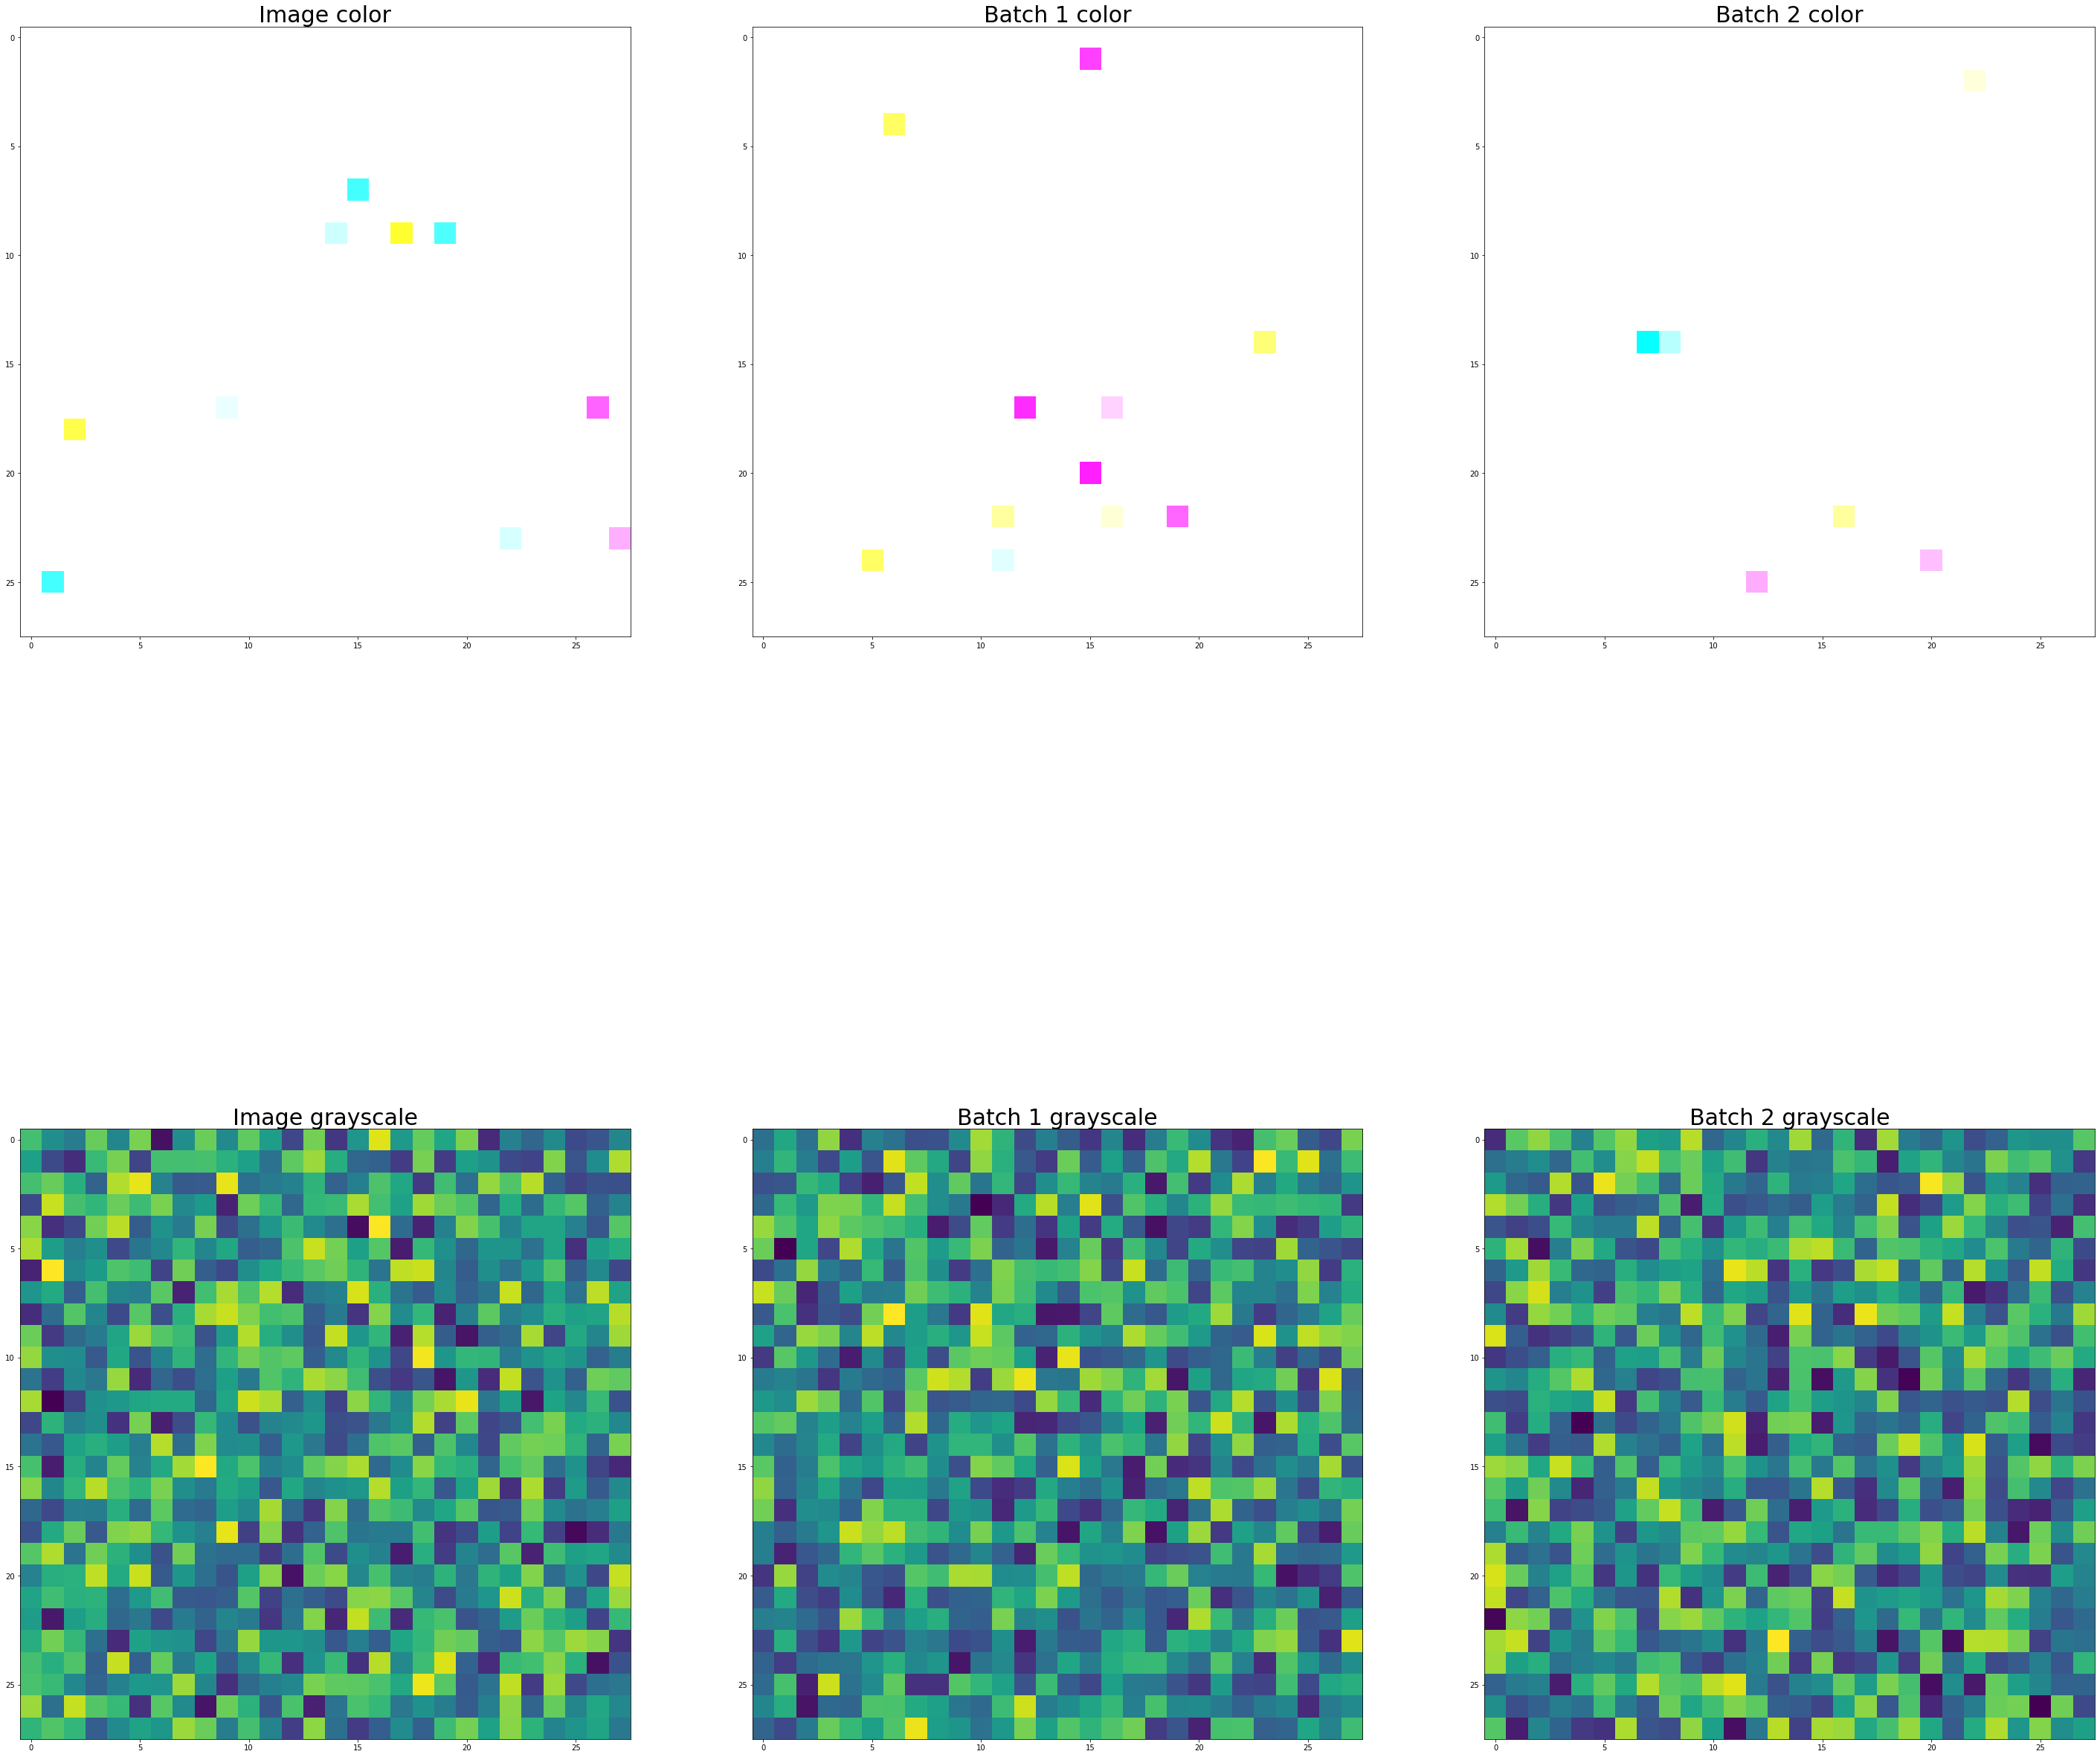

In [73]:
# trying to plot the images

from pylab import rcParams
rcParams['figure.figsize'] = 50, 50

img_n = img.resize(28, 28, 3)
batch_n = batch.resize(28, 28, 3, 2)

plt.subplot(2, 3, 1)
plt.title("Image color", fontsize=30)
fig = plt.imshow(img_n)

plt.subplot(2, 3, 2)
plt.title("Batch 1 color", fontsize=30)
plt.imshow(batch_n[..., 0])

plt.subplot(2, 3, 3)
plt.title("Batch 2 color", fontsize=30)
plt.imshow(batch_n[..., 1])

plt.subplot(2, 3, 4)
plt.title("Image grayscale", fontsize=30)
fig = plt.imshow(img_gray)

batch_n = batch_gray.resize(28, 28, 2)

plt.subplot(2, 3, 5)
plt.title("Batch 1 grayscale", fontsize=30)
plt.imshow(batch_n[..., 0])

plt.subplot(2, 3, 6)
plt.title("Batch 2 grayscale", fontsize=30)
plt.imshow(batch_n[..., 1])

plt.show()

In [21]:
# different dtypes in pytorch

torch.int8, torch.int16, torch.int32, torch.int64
torch.float, torch.float16, torch.float32, torch.float64
torch.bool

torch.bool

In [22]:
# TO CHANGE THE DTYPE TWO METHODS ARE THERE
print(p.dtype)
print(p.int().dtype)
print(p.to(torch.int64).dtype)

torch.float64
torch.int32
torch.int64


In [77]:
# trying to understand the underlying storage working of tensors

print(p)
p.storage() # storage is where the data is stored in a 1D array (always)
# regardless of the tensor's dimension

tensor([[ 4.0000,  2.0000],
        [ 4.0000,  5.6000],
        [ 1.3000, 13.0000]], dtype=torch.float64)


 4.0
 2.0
 4.0
 5.6
 1.3
 13.0
[torch.DoubleStorage of size 6]

In [78]:
st = p.storage()
st[3] = 13123123123
# this will change the actual tensor too

print(st)
p

 4.0
 2.0
 4.0
 13123123123.0
 1.3
 13.0
[torch.DoubleStorage of size 6]


tensor([[4.0000e+00, 2.0000e+00],
        [4.0000e+00, 1.3123e+10],
        [1.3000e+00, 1.3000e+01]], dtype=torch.float64)